In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df_elo = pd.read_csv("data/metric_data_elo.csv", parse_dates=["date"], index_col=0)
df_elo_adj = pd.read_csv(
    "data/metric_data_adjusted.csv", parse_dates=["date"], index_col=0
)
df_ts = pd.read_csv("data/metric_data_trueskill.csv", parse_dates=["date"], index_col=0)
df_multi = pd.read_csv(
    "data/metric_data_multielo.csv", parse_dates=["date"], index_col=0
)

In [6]:
df_elo.head()

,date,organization,division,class,kt_corr,kt_corr_alpha,prec_5_score,prec_5_score_alpha,30dayrollavg_kt_corr,30dayrollavg_kt_corr_alpha,30dayrollavg_prec_5_score,30dayrollavg_prec_5_score_alpha
0,2012-02-18,ifbb,men's bodybuilding,open,0.214024,0.332106,0.6,0.6,0.214024,0.332106,0.60,0.600000
1,2012-03-02,ifbb,men's bodybuilding,open,0.142857,-0.340659,0.2,0.2,0.178440,-0.004277,0.40,0.400000
2,2012-04-28,ifbb,men's bodybuilding,open,0.098901,0.208791,0.4,0.2,0.151927,0.066746,0.40,0.333333
3,2012-05-19,ifbb,men's bodybuilding,open,0.381818,-0.236364,0.8,0.2,0.209400,-0.009032,0.50,0.300000
4,2012-06-01,ifbb,men's bodybuilding,open,0.244444,0.066667,0.8,0.6,0.216409,0.006108,0.56,0.360000


In [7]:
df_elo_merge = pd.merge(df_elo, df_elo_adj, how="inner", on=['date', 'organization', 'division', 'class'],
                      suffixes=["_elo", "_elo_adj"])

df_ts_multi_merge = pd.merge(df_ts, df_multi, how="inner", on=['date', 'organization', 'division', 'class'],
                      suffixes=["_multi", "_ts"])

df_merge = pd.merge(df_elo_merge, df_ts_multi_merge, how="inner", on=['date', 'organization', 'division', 'class'])

In [8]:
df_merge.columns

Index(['date', 'organization', 'division', 'class', 'kt_corr_elo',
       'kt_corr_alpha', 'prec_5_score_elo', 'prec_5_score_alpha',
       '30dayrollavg_kt_corr_elo', '30dayrollavg_kt_corr_alpha',
       '30dayrollavg_prec_5_score_elo', '30dayrollavg_prec_5_score_alpha',
       'kt_corr_elo_adj', 'prec_5_score_elo_adj',
       '30dayrollavg_kt_corr_elo_adj', '30dayrollavg_prec_5_score_elo_adj',
       'ndcg_score_multi', 'ndcg_score_random_multi', 'kt_corr_multi',
       'kt_corr_random_multi', 'kt_pvalue_multi', 'kt_pvalue_random_multi',
       'prec_5_score_multi', 'prec_5_score_random_multi',
       '30dayrollavg_ndcg_score_multi', '30dayrollavg_ndcg_score_random_multi',
       '30dayrollavg_kt_corr_multi', '30dayrollavg_kt_corr_random_multi',
       '30dayrollavg_kt_pvalue_multi', '30dayrollavg_kt_pvalue_random_multi',
       '30dayrollavg_prec_5_score_multi',
       '30dayrollavg_prec_5_score_random_multi', 'ndcg_score_ts',
       'ndcg_score_random_ts', 'kt_corr_ts', 'kt_corr_ra

In [95]:
df_melt = (
    df_merge.melt(
        id_vars=[
            "date",
            "organization",
            "division",
            "class",
            "30dayrollavg_prec_5_score_elo",
            "30dayrollavg_prec_5_score_elo_adj",
            "30dayrollavg_prec_5_score_ts",
            "30dayrollavg_prec_5_score_multi",
            "30dayrollavg_prec_5_score_random_elo",
        ],
        value_vars=[
            "30dayrollavg_kt_corr_elo",
            "30dayrollavg_kt_corr_elo_adj",
            "30dayrollavg_kt_corr_multi",
            "30dayrollavg_kt_corr_ts",
            "30dayrollavg_kt_corr_random_elo",
        ],
        var_name="metric",
        value_name="30day_rolling_avg_kt_corr",
    )
    .melt(
        id_vars=[
            "date",
            "organization",
            "division",
            "class",
            "metric",
            "30day_rolling_avg_kt_corr",
        ],
        value_vars=[
            "30dayrollavg_prec_5_score_elo",
            "30dayrollavg_prec_5_score_elo_adj",
            "30dayrollavg_prec_5_score_ts",
            "30dayrollavg_prec_5_score_multi",
            "30dayrollavg_prec_5_score_random_elo",
        ],
        var_name="metric2",
        value_name="30day_rolling_avg_prec_5_score",
    )
)

In [96]:
df_replace = df_melt.replace({
    "30dayrollavg_kt_corr_elo": "elo",
    "30dayrollavg_kt_corr_elo_adj": "adjusted elo",
    "30dayrollavg_kt_corr_ts": "trueskill",
    "30dayrollavg_kt_corr_multi": "multi-elo",
    "30dayrollavg_kt_corr_random_elo": "random",
    "30dayrollavg_prec_5_score_elo": "elo",
    "30dayrollavg_prec_5_score_elo_adj": "adjusted elo",
    "30dayrollavg_prec_5_score_ts": "trueskill",
    "30dayrollavg_prec_5_score_multi": "multi-elo",
    "30dayrollavg_prec_5_score_random_elo": "random"
})

df_metric = df_replace[df_replace["metric"] == df_replace["metric2"]].drop(["metric2"], axis=1)

In [97]:
df_metric.head()

,date,organization,division,class,metric,30day_rolling_avg_kt_corr,30day_rolling_avg_prec_5_score
0,2012-02-18,ifbb,fitness,open,elo,0.121212,0.40
1,2012-03-02,ifbb,fitness,open,elo,0.285606,0.60
2,2012-03-16,ifbb,fitness,open,elo,0.282997,0.60
3,2012-05-05,ifbb,fitness,open,elo,0.295581,0.60
4,2012-06-01,ifbb,fitness,open,elo,0.291010,0.64


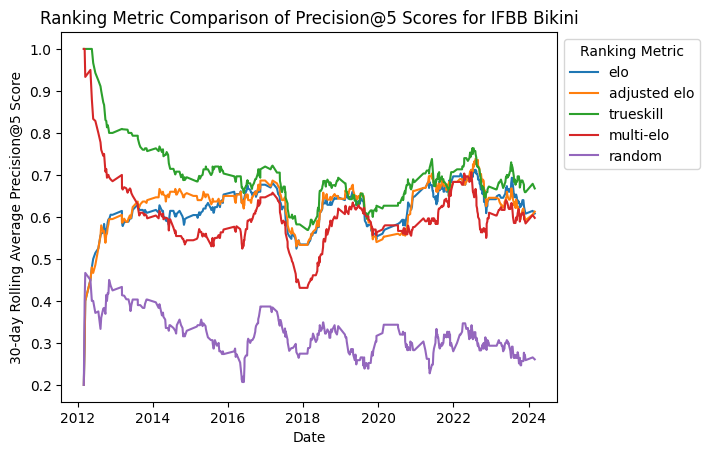

In [98]:
ax = sns.lineplot(
    data=df_metric[
        (df_metric["organization"] == "ifbb")
        & (df_metric["division"] == "bikini")
        & (df_metric["class"] == "open")
    ],
    x="date",
    y="30day_rolling_avg_prec_5_score",
    hue="metric"
)
plt.xlabel("Date")
plt.ylabel("30-day Rolling Average Precision@5 Score")
plt.title("Ranking Metric Comparison of Precision@5 Scores for IFBB Bikini")
plt.legend(title="Ranking Metric")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

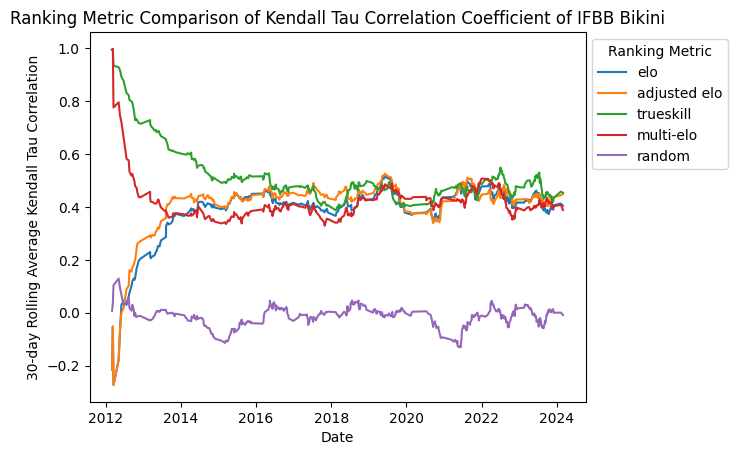

In [100]:
ax = sns.lineplot(
    data=df_metric[
        (df_metric["organization"] == "ifbb")
        & (df_metric["division"] == "bikini")
        & (df_metric["class"] == "open")
    ],
    x="date",
    y="30day_rolling_avg_kt_corr",
    hue="metric"
)
plt.xlabel("Date")
plt.ylabel("30-day Rolling Average Kendall Tau Correlation")
plt.legend(title="Ranking Metric")
plt.title("Ranking Metric Comparison of Kendall Tau Correlation Coefficient of IFBB Bikini")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))